<a href="https://colab.research.google.com/github/sykathowlader/group6_introToAi/blob/main/K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import math


url = "https://sykathowlader.github.io/visualization_data/diabetes.csv"

df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df1.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Assuming the correct column name is 'Diabetes_012'
y = df1['Diabetes_012']
X = df1.drop('Diabetes_012', axis=1)

# Scale the features
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=[np.number]).columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=12)

# Train the k-NN model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

Test accuracy: 0.842


In [9]:
# Create and fit a nearest-neighbor classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Print predictions and target values
print("Predictions from the classifier:")
print(knn.predict(X_test))
print("Target values:")
print(y_test)

Predictions from the classifier:
[0. 0. 0. ... 0. 0. 0.]
Target values:
219620    0.0
132821    0.0
151862    0.0
139717    0.0
239235    0.0
         ... 
169513    2.0
182415    0.0
109739    0.0
181671    0.0
202118    0.0
Name: Diabetes_012, Length: 50736, dtype: float64


In [11]:
y_pred=knn.predict(X_test)

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8697
Test set score: 0.8303


In [14]:
#check MSE & RMSE
mse = mean_squared_error (y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.6208806370230211
Root Mean Squared Error : 0.7879597940396585


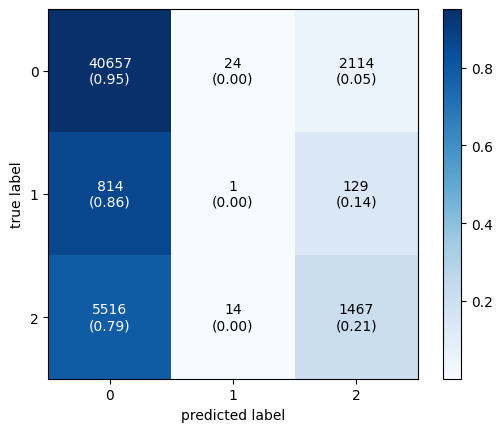

In [17]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()